In [ ]:
import cv2
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.color import rgb2gray
from skimage.measure import label
from skimage import img_as_ubyte
import matplotlib.pyplot as plt


In [ ]:
# Load the original image
image_path = "/content/stomach.jpg"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for processing



# Image Processing for Stomach Cancer Detection

This script performs several image processing steps to analyze and segment an image for potential stomach cancer detection. The steps include displaying the original image, partitioning it into superpixels, and applying various segmentation methods.

## Steps

### 1. Display Original Image
- **Deskripsi:**
  Gambar asli dimuat menggunakan pustaka OpenCV (`cv2`) dan diubah ke format RGB untuk memastikan warna ditampilkan dengan benar dalam analisis dan visualisasi.
- **Output:**
  Gambar asli ditampilkan menggunakan Matplotlib.

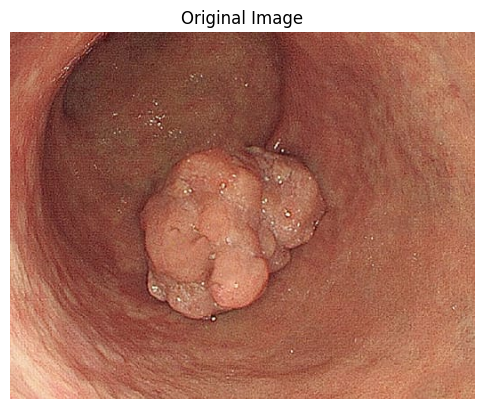

In [ ]:
# Step 1: Display Original Image
def display_image(title, img):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.axis('off')
    plt.show()

display_image("Original Image", original_image)



### 2. Partitioned Image (SLIC Superpixels)
- **Deskripsi:**
  Gambar dibagi menjadi beberapa segmen kecil yang disebut superpixels menggunakan algoritma **SLIC (Simple Linear Iterative Clustering)**. Superpixels membantu menyederhanakan proses analisis gambar dengan mengelompokkan piksel berdasarkan kemiripan fitur.
- **Fungsi Utama:**
  `slic` dari pustaka `skimage.segmentation`.
- **Output:**
  Gambar dengan batas-batas superpixels ditampilkan menggunakan fungsi `mark_boundaries`.

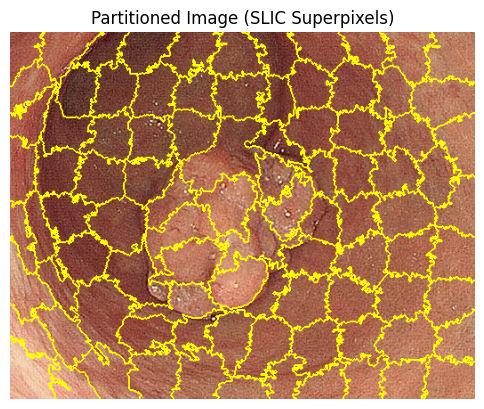

In [ ]:
# Step 2: Partitioned Image using SLIC Superpixels
segments = slic(original_image, n_segments=100, compactness=10, start_label=1)
partitioned_image = mark_boundaries(original_image, segments)

display_image("Partitioned Image (SLIC Superpixels)", partitioned_image)



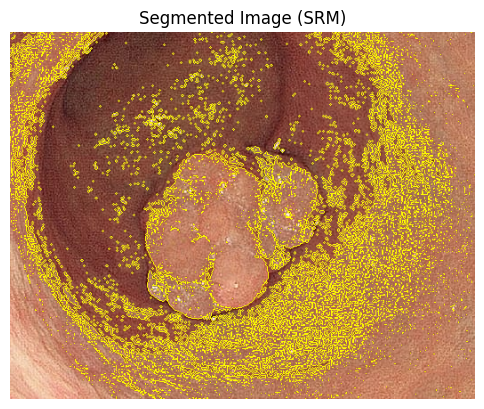

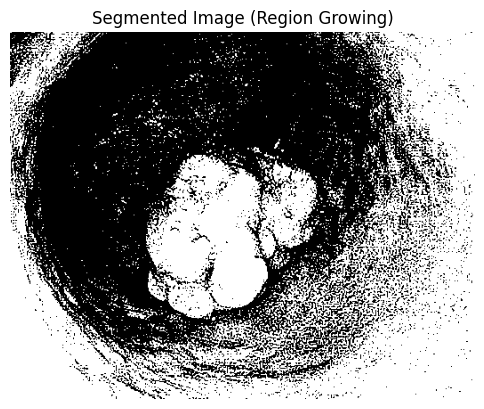

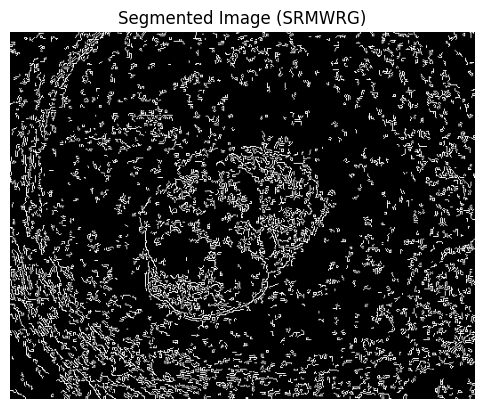

True

In [ ]:
# Step 3: Segmentation Methods

# 3.1 Statistical Region Merging (SRM)
def srm_segmentation(image):
    gray_image = rgb2gray(image)
    labels = label(gray_image > gray_image.mean())
    return mark_boundaries(image, labels)

srm_segmented = srm_segmentation(original_image)
display_image("Segmented Image (SRM)", srm_segmented)

# 3.2 Region Growing (RG)
def region_growing(image):
    gray = rgb2gray(image)
    seed_point = (gray.shape[0] // 2, gray.shape[1] // 2)  # Seed at the center
    mask = np.zeros_like(gray, dtype=np.uint8)
    binary_image = (gray > gray.mean()).astype(np.uint8) * 255

    # Perform flood fill
    filled_image = binary_image.copy()
    cv2.floodFill(filled_image, None, seedPoint=seed_point, newVal=255)
    return filled_image

rg_segmented = region_growing(original_image)
display_image("Segmented Image (Region Growing)", rg_segmented)

# 3.3 Simplified Region Merging with Weighted Region Growing (SRMWRG)
def simplified_region_merging(image):
    edges = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), 100, 200)
    return edges

srmwrg_segmented = simplified_region_merging(original_image)
display_image("Segmented Image (SRMWRG)", srmwrg_segmented)

# Save Final Results
cv2.imwrite("/content/partitioned_image.jpg", img_as_ubyte(partitioned_image))
cv2.imwrite("/content/srm_segmented.jpg", img_as_ubyte(srm_segmented))
cv2.imwrite("/content/rg_segmented.jpg", img_as_ubyte(rg_segmented))
cv2.imwrite("/content/srmwrg_segmented.jpg", srmwrg_segmented)




### 3. Segmentation Methods

#### 3.1 Statistical Region Merging (SRM)
- **Deskripsi:**
  Metode ini menggunakan properti statistik dari intensitas piksel untuk membentuk wilayah-wilayah yang serupa. Sebuah ambang (threshold) ditentukan berdasarkan nilai rata-rata intensitas gambar grayscale.
- **Fungsi Utama:**
  - `rgb2gray` untuk mengubah gambar ke grayscale.  
  - `label` untuk memberikan label pada wilayah dengan nilai di atas ambang.
- **Output:**
  Batas-batas wilayah segmentasi ditampilkan pada gambar asli.

#### 3.2 Region Growing (RG)
- **Deskripsi:**
  Metode ini memulai segmentasi dari titik awal (seed point) dan memperluas wilayah berdasarkan kesamaan piksel (misalnya, intensitas). Flood-fill digunakan untuk memperluas wilayah secara iteratif.
- **Langkah Utama:**
  1. Gambar diubah ke grayscale.
  2. Mask biner dibuat menggunakan ambang berdasarkan rata-rata intensitas.
  3. Algoritma flood-fill diterapkan dari titik tengah gambar.
- **Fungsi Utama:**
  `cv2.floodFill`.
- **Output:**
  Wilayah yang diperluas oleh algoritma ditampilkan sebagai area yang terisi.

#### 3.3 Simplified Region Merging with Weighted Region Growing (SRMWRG)
- **Deskripsi:**
  Metode ini menggunakan deteksi tepi untuk menyederhanakan proses segmentasi. Tepi objek dalam gambar diidentifikasi menggunakan algoritma Canny.
- **Fungsi Utama:**
  `cv2.Canny` untuk mendeteksi tepi.
- **Output:**
  Peta tepi yang menyoroti batas-batas objek dalam gambar.

### 4. Save Results
- **Deskripsi:**
  Hasil dari setiap metode segmentasi disimpan sebagai file gambar untuk keperluan lebih lanjut. Lokasi penyimpanan file telah ditentukan di dalam script:
  - Gambar terpartisi: /content/partitioned_image.jpg
  - Gambar hasil SRM: /content/srm_segmented.jpg
  - Gambar hasil RG: /content/rg_segmented.jpg
  - Gambar hasil SRMWRG: /content/srmwrg_segmented.jpg

## Results Explanation

### **1. Segmented Image (Statistical Region Merging - SRM)**
- **Deskripsi:**
  Pada gambar pertama, metode SRM (Statistical Region Merging) digunakan untuk membagi gambar ke dalam wilayah-wilayah berdasarkan kesamaan statistik intensitas piksel.
- **Hasil:**
  - Wilayah yang disorot dengan batas kuning menunjukkan area yang dianggap serupa secara statistik.
  - Wilayah ini mencakup area yang menonjol pada gambar, seperti tumor atau struktur abnormal lainnya.
- **Analisis:**
  - Metode ini efektif dalam membedakan antara area utama (tumor) dan latar belakang.
  - Akurasi segmentasi bergantung pada ambang batas yang ditentukan dari intensitas rata-rata gambar grayscale.

### **2. Segmented Image (Region Growing - RG)**
- **Deskripsi:**
  Pada gambar kedua, metode Region Growing diterapkan untuk memperluas wilayah dari titik awal (seed point) berdasarkan kesamaan piksel.
- **Hasil:**
  - Wilayah terang di tengah gambar menunjukkan area yang berhasil diperluas oleh algoritma. Area ini mencakup kemungkinan lokasi tumor.
  - Latar belakang yang gelap membantu memperjelas kontras dengan area target.
- **Analisis:**
  - Algoritma ini berguna untuk mendeteksi wilayah dengan perbedaan intensitas yang jelas.
  - Keberhasilan segmentasi sangat bergantung pada pemilihan seed point dan nilai ambang.

### **3. Segmented Image (SRMWRG)**
- **Deskripsi:**
  Pada gambar ketiga, metode SRMWRG (Simplified Region Merging with Weighted Region Growing) menghasilkan peta tepi menggunakan algoritma Canny untuk mendeteksi tepi objek.
- **Hasil:**
  - Tepi objek yang terdeteksi membantu memperjelas batas-batas wilayah yang mencurigakan.
  - Batas yang terlihat dapat digunakan untuk analisis lebih lanjut.
- **Analisis:**
  - Pendekatan ini efektif dalam membedakan batas area abnormal (misalnya, tumor) dari latar belakang.
  - Hasil segmentasi sangat bergantung pada parameter deteksi tepi seperti ambang atas dan bawah.

## Usage
Untuk menjalankan skrip ini, pastikan pustaka berikut sudah terinstal:
- OpenCV (`cv2`)
- NumPy
- Scikit-Image
- Matplotlib

Eksekusi skrip di lingkungan Python yang mendukung pustaka tersebut. Ganti variabel `image_path` dengan jalur ke gambar input Anda.


## Usage
Untuk menjalankan skrip ini, pastikan pustaka berikut sudah terinstal:
- OpenCV (`cv2`)
- NumPy
- Scikit-Image
- Matplotlib

Eksekusi skrip di lingkungan Python yang mendukung pustaka tersebut. Ganti variabel `image_path` dengan jalur ke gambar input Anda.
